# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [3]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [4]:
X = data[['size','nb_bedrooms']].values
y = data['price'].values.reshape((-1, 1))
print(X)
print(y)

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]
[[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]
 [239999]
 [347000]
 [329999]
 [699900]
 [259900]
 [449900]
 [299900]
 [199900]
 [499998]
 [599000]
 [252900]
 [255000]
 [242900]
 [259900]
 [573900]
 [249900]
 [464500]
 [469000]
 [475000]
 [299900]
 [349900]
 [169900]
 [314900]
 [579900]
 [285900]
 [249900]
 [229900]
 [345000]
 [549000

### Initialisez theta (combien de dimensions?)

In [5]:
theta = np.zeros(X.ndim + 1).reshape((-1, 1))
print(theta)

[[0.]
 [0.]
 [0.]]


### Vérifiez les dimensions de theta et de X. Sont-elles compatibles pour implémenter la fonction d'hypothèse sous forme vectorisée?

In [6]:
print(theta.shape)

(3, 1)


In [7]:
print(X.shape)

(47, 2)


### Modifiez X en conséquence

In [8]:
X = np.insert(X, 0, 1, axis=1)
print(X)

[[   1 2104    3]
 [   1 1600    3]
 [   1 2400    3]
 [   1 1416    2]
 [   1 3000    4]
 [   1 1985    4]
 [   1 1534    3]
 [   1 1427    3]
 [   1 1380    3]
 [   1 1494    3]
 [   1 1940    4]
 [   1 2000    3]
 [   1 1890    3]
 [   1 4478    5]
 [   1 1268    3]
 [   1 2300    4]
 [   1 1320    2]
 [   1 1236    3]
 [   1 2609    4]
 [   1 3031    4]
 [   1 1767    3]
 [   1 1888    2]
 [   1 1604    3]
 [   1 1962    4]
 [   1 3890    3]
 [   1 1100    3]
 [   1 1458    3]
 [   1 2526    3]
 [   1 2200    3]
 [   1 2637    3]
 [   1 1839    2]
 [   1 1000    1]
 [   1 2040    4]
 [   1 3137    3]
 [   1 1811    4]
 [   1 1437    3]
 [   1 1239    3]
 [   1 2132    4]
 [   1 4215    4]
 [   1 2162    4]
 [   1 1664    2]
 [   1 2238    3]
 [   1 2567    4]
 [   1 1200    3]
 [   1  852    2]
 [   1 1852    4]
 [   1 1203    3]]


## Écrivez une fonction pour centrer et réduire les features

In [9]:
def featureScaleNormalize(X):
    mean = X[:,1:].mean(axis=0)
    stdev = X[:,1:].std(axis=0)
    res = (X.copy()[:,1:] - mean) / stdev
    res = np.insert(res, 0, 1, axis=1)
    return res, mean, stdev

In [10]:
X, mean, stdev = featureScaleNormalize(X)
print(mean)
print(stdev)
print(X)

[2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]
[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [23]:
def predict(X, theta):
    return np.dot(X, theta)

In [24]:
def cost(X, y, theta):
    return np.sum((predict(X, theta) - y)**2) / 2 / X.shape[0]


In [32]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    J_history = list()
    coef = alpha / X.shape[0]
    theta = theta.copy()
    for i in range(num_iters):
        J_history.append(cost(X, y, theta))
        diff = predict(X, theta) - y
        prevtheta = theta.copy()
        theta -= coef * np.dot(X.T, diff)
        if (prevtheta == theta).all():
            break    
    return theta, np.array(J_history), i

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

In [37]:
theta2, J_history, nb_iterations = fit_with_cost(X, y, theta, 0.0001, 5000000)
print("Nombre d'itérations : ", nb_iterations)
print(theta2)
print(J_history)



Nombre d'itérations :  643631
[[340412.65957418]
 [109447.79646953]
 [ -6578.3548541 ]]
[6.55915481e+10 6.55785428e+10 6.55655402e+10 ... 2.04328005e+09
 2.04328005e+09 2.04328005e+09]


## Visualisez l'évolution du coût (graphe de convergence)

[[1.80909542e+08]]


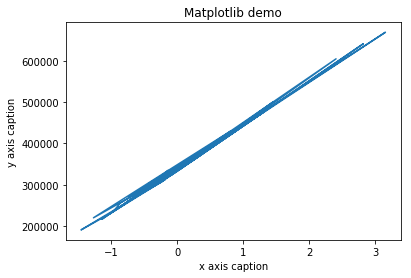

In [73]:
import matplotlib.pyplot as plt

#fit = plt.figure()
#ax = plt.axes()
#ax.plot(J_history)

L = np.array([np.random.randint(500, 4000, 50), np.random.randint(1, 5, 50)])
L = np.insert(L, 0, 1, axis=0)
L = L.T

print(predict([[1, 1650, 3]], theta2))

plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption")
plt.plot(X[:,1], predict(X, theta2))
plt.show()

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [74]:
# reduire les valeurs
print(predict([[1, 1650, 3]], theta2)[0, 0])

180909541.7697399


### Réécrivez votre fonction fit pour qu'elle prenne en compte un parametre de regularisation (L1, L2 pour Lasso ou Ridge) et adapte la mise  a jour de theta an fonction de la regularization précisée

In [ ]:
def fit_with_regularization(X, y, theta, alpha, num_iters, regularization=""):
    
    
    
    
    return theta, J_history

### La fonction fit au complet. Ajoutez un dernier parametre qui précise le gradient employé (stochastic, mini_batch(avec le batch_size), batch). Pour la descente de gradient stochastic et minibatch on met a jour le learning rate avec la formule du learning rate decay

In [ ]:
def complete_fit(X, y, theta, alpha, num_iters, regularization="", gradient_descent="batch", batch_size=4, decay_rate=1):
    
    
    
    
    return theta, J_history